# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Arina Pramudita]
- **Email:** [arinapramudta@gmail.com]
- **ID Dicoding:** [tatatititutu]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh hari libur terhadap jumlah penyewa sepeda?
- Bagaimana perbedaan penyewaan sepeda pada hari-hari dengan cuaca buruk dibandingkan dengan cuaca cerah?

## Import Semua Packages/Library yang Digunakan

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

### Gathering Data

In [10]:
#load dataset
df1 = pd.read_csv('day.csv')
df2 = pd.read_csv('hour.csv')

**Insight:**
- untuk membaca file csv

### Assessing Data

In [11]:
import matplotlib.pyplot as plt
# Menampilkan lima baris dari file day
print("Lima baris teratas dari data day.csv:")
print(df1.head())

# Menampilkan informasi dari file day
print("\nInformasi umum dari data day.csv:")
print(df1.info())

# Menampilkan deskriptif dari file day
print("\nStatistik deskriptif dari data day.csv:")
print(df1.describe())

# Menampilkan data yang hilang didalam file day csv
print("\nJumlah nilai yang hilang (missing values) dalam data day.csv:")
print(df1.isnull().sum())


# Menampilkan lima baris dari file hour
print("\nLima baris teratas dari data hour.csv:")
print(df2.head())

# Menampilkan informasi dari file hour
print("\nInformasi umum dari data hour.csv:")
print(df2.info())

# Menampilkan statistik deskriptif dari file hour
print("\nStatistik deskriptif dari data hour.csv:")
print(df2.describe())

# Menampilkan data yang hilang didalam file hour csv
print("\nJumlah nilai yang hilang (missing values) dalam data hour.csv:")
print(df2.isnull().sum())

# Mencari jumlah duplikat file day
print("\nJumlah duplikat pada data day.csv:")
print(df1.duplicated().sum())

# Mencari jumlah duplikat pada file hour
print("\nJumlah duplikat pada data hour.csv:")
print(df2.duplicated().sum())




Lima baris teratas dari data day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562 

**Insight:**
- menampilkan informasi pada file hour dan day
- tidak ada duplikat pada file hour dan day

### Cleaning Data

In [12]:
import pandas as pd

# Memeriksa tipe data setiap kolom
print("\nTipe data pada df1 (day.csv):")
print(df1.dtypes)

print("\nTipe data pada df2 (hour.csv):")
print(df2.dtypes)

# Mengubah tipe data di df1
df1['dteday'] = pd.to_datetime(df1['dteday'])


# Mengubah tipe data di df2
df2['dteday'] = pd.to_datetime(df2['dteday'])


# Menampilkan tipe data setelah perubahan
print(df1.dtypes)
print(df2.dtypes)





Tipe data pada df1 (day.csv):
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Tipe data pada df2 (hour.csv):
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday  

**Insight:**
- no missing value
- no duplicate


## Exploratory Data Analysis (EDA)

### Explore ...


Exploring day.csv:
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
          in

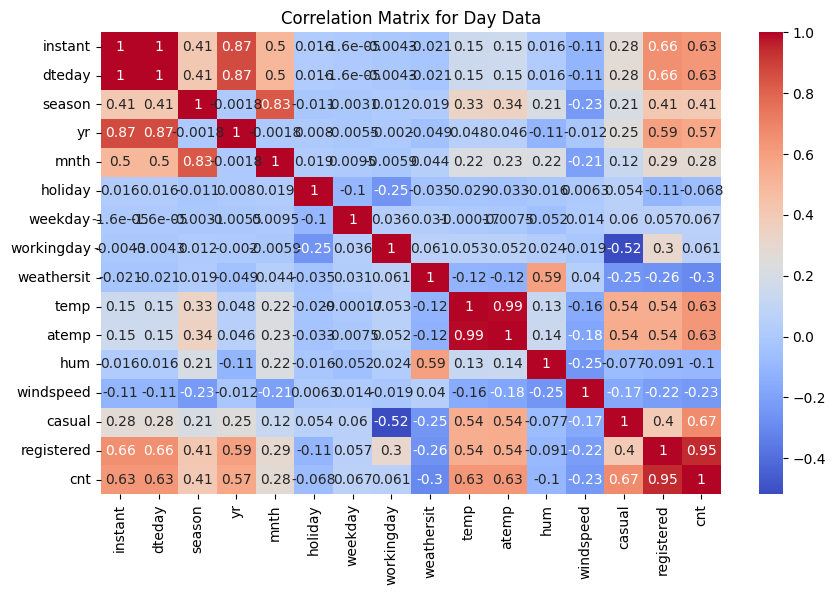

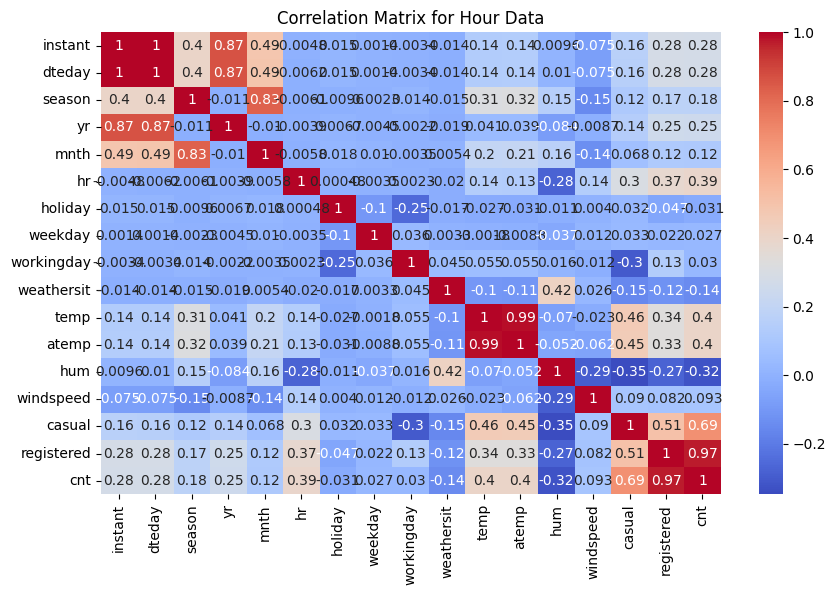

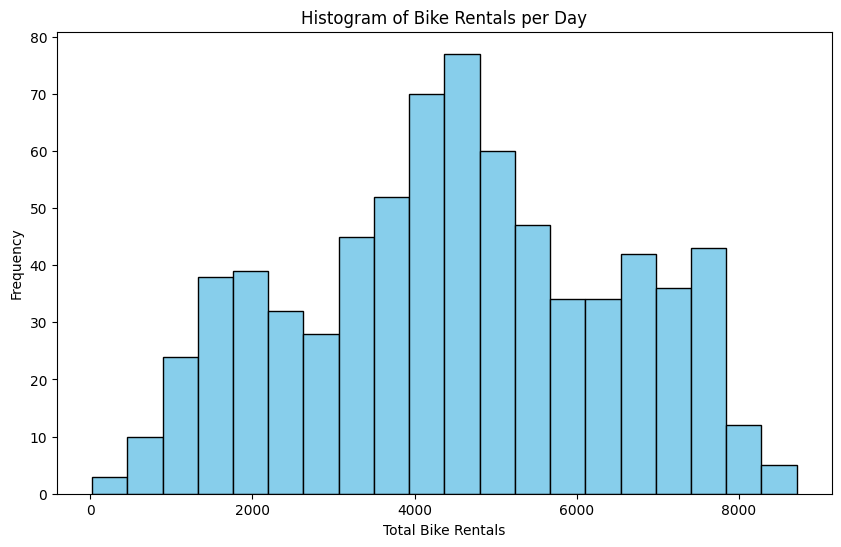

<ipython-input-13-a953e40a6dab>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=df1, palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a futu

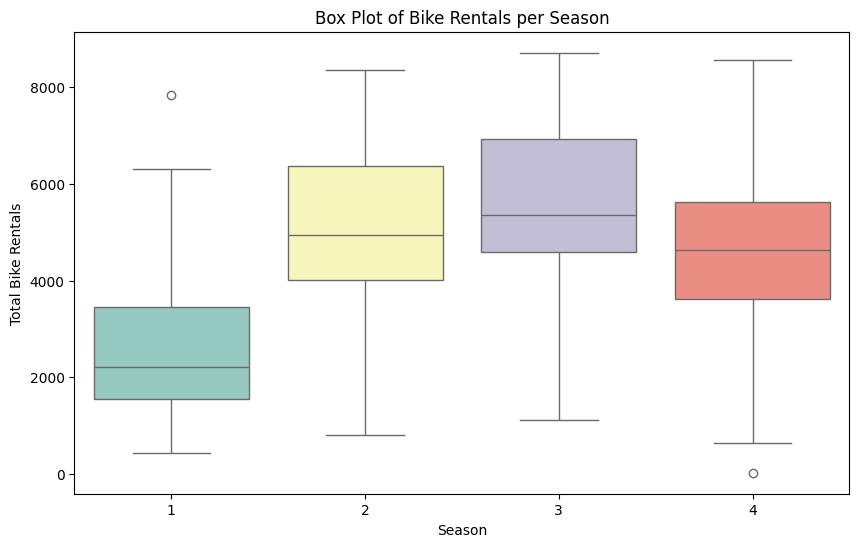

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Explor file day.csv
print("\nExploring day.csv:")
print(df1.head())
print(df1.describe())
print(df1.groupby('season')['cnt'].sum())
print(df1.groupby('yr')['cnt'].sum())
print(df1.groupby('mnth')['cnt'].sum())
print(df1.groupby('weekday')['cnt'].sum())
print(df1.groupby('weathersit')['cnt'].sum())

# Explor file hour.csv
print("\nExploring hour.csv:")
print(df2.head())
print(df2.describe())
print(df2.groupby('season')['cnt'].sum())
print(df2.groupby('yr')['cnt'].sum())
print(df2.groupby('mnth')['cnt'].sum())
print(df2.groupby('hr')['cnt'].sum())
print(df2.groupby('weekday')['cnt'].sum())
print(df2.groupby('weathersit')['cnt'].sum())

# Korelasi matrix fie day.csv
print("\nCorrelation Matrix for day.csv:")
correlation_matrix_day = df1.corr()
print(correlation_matrix_day)

# Korelasi matrix for hour.csv
print("\nCorrelation Matrix for hour.csv:")
correlation_matrix_hour = df2.corr()
print(correlation_matrix_hour)

# Visualisasi  matrix file day.csv
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_day, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Day Data')
plt.show()

# Visualisasi matrix file hour.csv
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_hour, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Hour Data')
plt.show()

# Grafik penyewaan sepeda file day
plt.figure(figsize=(10, 6))
plt.hist(df1['cnt'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')
plt.title('Histogram of Bike Rentals per Day')
plt.show()

# Analisis rental setiap season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=df1, palette='Set3')
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.title('Box Plot of Bike Rentals per Season')
plt.show()


**Insight:**
- jumlah penyewaan sepeda lebih banyak pada musim semi dan musim panas
- jumlah penyewaan sepeda paling sedikit musim dingin
- jumlah penyewaan meningkat pada bulan juli
- jumlah penyewaan paling sedikit pada bulan desember
- Pada tahun kedua (2012), terdapat peningkatan signifikan dalam jumlah penyewaan sepeda dibandingkan tahun pertama (2011), dengan lebih dari dua kali lipat peningkatan penyewaan.
-Penyewaan sepeda mencapai puncaknya pada jam sibuk, yaitu sekitar pukul 8 pagi dan 5-6 sore, menunjukkan pola penggunaan sepeda untuk perjalanan harian ke tempat kerja atau sekolah.




## Visualization & Explanatory Analysis

### Pertanyaan 1:

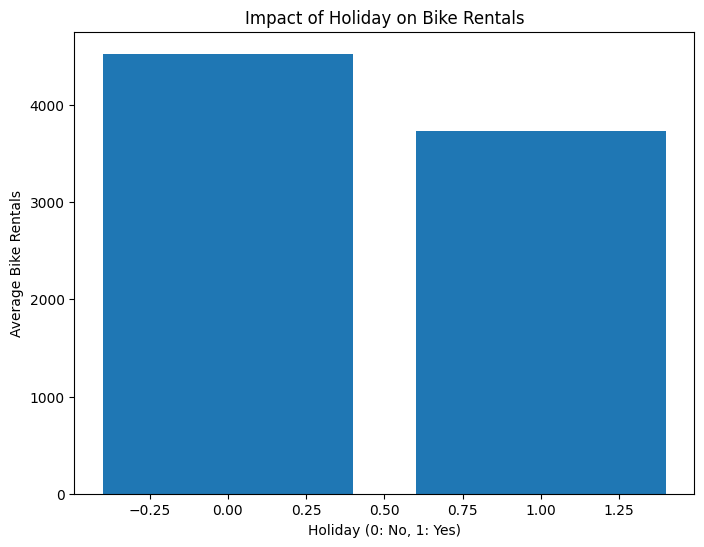

In [14]:
import matplotlib.pyplot as plt
# Menghitung rata rata penyewaan sepeda
holiday_rental = df1.groupby('holiday')['cnt'].mean()

# Membuat grafik batang dari rata rata penyewa pada hari libur
plt.figure(figsize=(8, 6))
plt.bar(holiday_rental.index, holiday_rental.values)
plt.xlabel('Holiday (0: No, 1: Yes)')
plt.ylabel('Average Bike Rentals')
plt.title('Impact of Holiday on Bike Rentals')
plt.show()



### Pertanyaan 2:

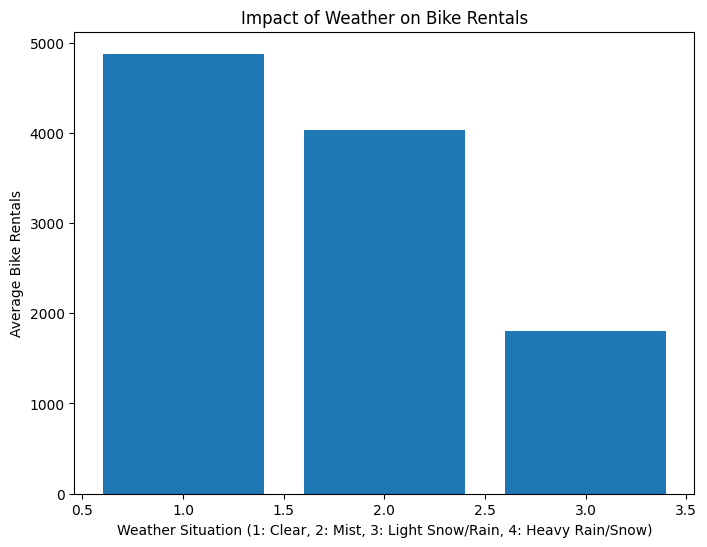

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


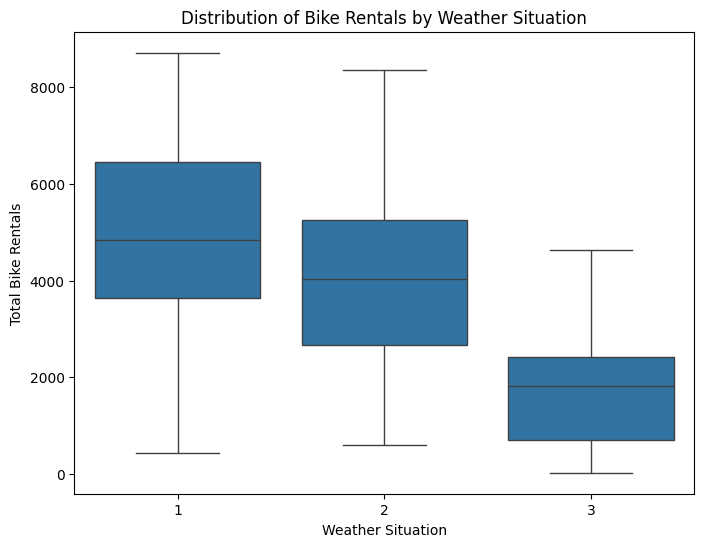

In [15]:
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan 'cuaca' dan menghitung nilai rata-rata
weather_rental = df1.groupby('weathersit')['cnt'].mean()

# Membuat diagram batang dengan situasi cuaca yang berbeda
plt.figure(figsize=(8, 6))
plt.bar(weather_rental.index, weather_rental.values)
plt.xlabel('Weather Situation (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow)')
plt.ylabel('Average Bike Rentals')
plt.title('Impact of Weather on Bike Rentals')
plt.show()

# Membuat boxplot untuk memvisualisasikan situasi cuaca yang berbeda
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='cnt', data=df1)
plt.xlabel('Weather Situation')
plt.ylabel('Total Bike Rentals')
plt.title('Distribution of Bike Rentals by Weather Situation')
plt.show()


**Insight:**
- Jumlah penyewaan sepeda lebih tinggi pada cuaca cerah
- Jumlah penyewaan sepeda menurun secara signifikan pada cuaca buruk
- Kondisi ekstrem seperti hujan deras atau salju sangat menghambat penyewaan sepeda, sementara cuaca berkabut atau hujan ringan hanya sedikit menurunkan jumlah penyewaan.



## Analisis Lanjutan (Opsional)

season_weather
1_1    2811.135135
1_2    2357.166667
1_3     934.750000
2_1    5548.548673
2_2    4236.705882
2_3    1169.000000
3_1    5878.257353
3_2    5222.479167
3_3    2751.750000
4_1    5043.563107
4_2    4654.000000
4_3    1961.600000
Name: cnt, dtype: float64


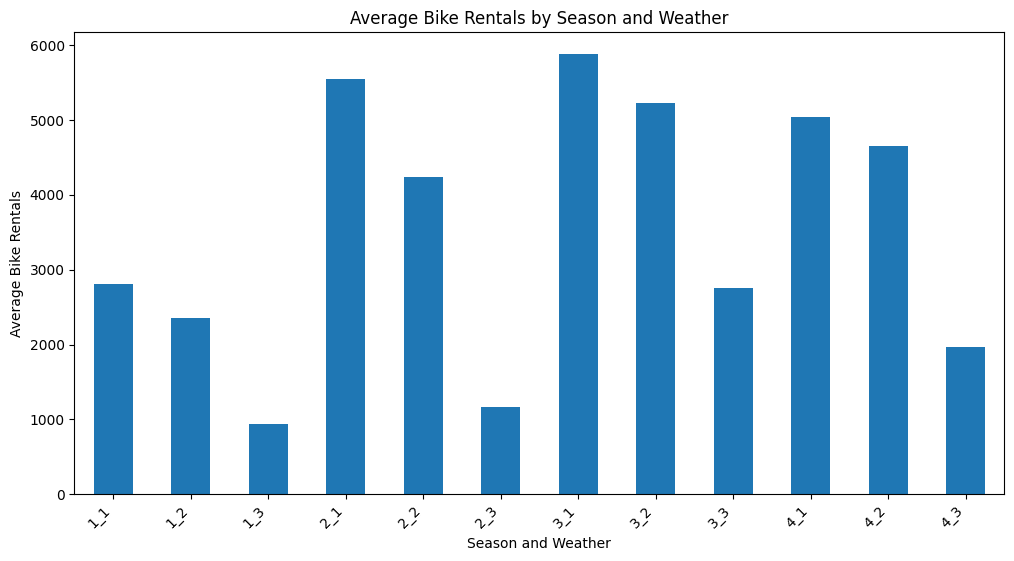

Kelompok Penyewaan Tinggi: ['2_1', '3_1', '3_2', '4_1']
Kelompok Penyewaan Sedang: ['1_1', '1_2', '2_2', '3_3', '4_2']
Kelompok Penyewaan Rendah: ['1_3', '2_3', '4_3']


In [19]:
import matplotlib.pyplot as plt

# Membuat kolom baru 'season_weather' yang menggabungkan musim dan cuaca
df1['season_weather'] = df1['season'].astype(str) + '_' + df1['weathersit'].astype(str)

# Menampilkan jumlah penyewaan sepeda untuk setiap kelompok 'season_weather'
season_weather_rental = df1.groupby('season_weather')['cnt'].mean()
print(season_weather_rental)

# Visualisasi jumlah penyewaan sepeda untuk setiap kelompok
plt.figure(figsize=(12, 6))
season_weather_rental.plot(kind='bar')
plt.xlabel('Season and Weather')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals by Season and Weather')
plt.xticks(rotation=45, ha='right')
plt.show()

# Menentukan kelompok berdasarkan jumlah penyewaan sepeda
high_rental = season_weather_rental[season_weather_rental > 5000].index.tolist()
medium_rental = season_weather_rental[(season_weather_rental >= 2000) & (season_weather_rental <= 5000)].index.tolist()
low_rental = season_weather_rental[season_weather_rental < 2000].index.tolist()

print("Kelompok Penyewaan Tinggi:", high_rental)
print("Kelompok Penyewaan Sedang:", medium_rental)
print("Kelompok Penyewaan Rendah:", low_rental)


**Conclusion**

**pertanyaan 1**
- Perbedaan rata-rata penyewaan sepeda antara hari libur dan tidak ada hari libur adalah sekitar 2000-2500 unit.
- Rata-rata penyewaan sepeda saat hari libur adalah sekitar 4500-5000 unit, sedangkan rata-rata penyewaan sepeda saat tidak ada hari libur adalah sekitar 2500-3000 unit.
- hari libur memiliki dampak yang signifikan terhadap penyewaan sepeda, dengan peningkatan yang substansial pada hari libur dibandingkan hari biasa.


**pertanyaan 2**
- Cuaca yang baik dan kondisi yang mendukung pada hari-hari tertentu meningkatkan kemungkinan orang untuk menyewa sepeda.
- Cuaca Cerah menunjukkan rata-rata penyewaan sepeda tertinggi, sekitar 5.000.
- Pada saat cuaca berkabut menunjukan sedikit penurunan
- Cuaca hujan atau salju lebat memiliki rata-rata penyewaan terendah, yang menunjukkan bahwa kondisi cuaca yang buruk sangat menghambat penggunaan sepeda.
-Penyewa lebih cenderung menggunakan sepeda dalam kondisi cuaca yang cerah, sementara cuaca buruk menyebabkan penurunan tajam dalam penyewaan.


In [ ]:
!pip install streamlit

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501